# Diffusion-TS Tutorial

## Diffusion-TS: Interpretable Diffusion for General Time Series Generation

This notebook describes the user-guide of a time-series synthetic data generation application using Diffusion-TS framework.

## Necessary packages and functions call

In [4]:
import os
import torch
import numpy as np

from engine.solver import Trainer
from Utils.metric_utils import visualization
from Data.build_dataloader import build_dataloader
from Utils.io_utils import load_yaml_config, instantiate_from_config
from Models.interpretable_diffusion.model_utils import unnormalize_to_zero_to_one

## Setting and Training

### Build dataset and settings

In [5]:
class Args_Example:
    def __init__(self,dataset_name) -> None:
        self.config_path = f'./Config/{dataset_name}.yaml'
        self.save_dir = f'./toy_{dataset_name}'
        self.gpu = 0
        os.makedirs(self.save_dir, exist_ok=True)
dataset_name="energy"
args =  Args_Example(dataset_name)
configs = load_yaml_config(args.config_path)
device = torch.device(f'cuda:{args.gpu}' if torch.cuda.is_available() else 'cpu')

dl_info = build_dataloader(configs, args)
model = instantiate_from_config(configs['model']).to(device)
trainer = Trainer(config=configs, args=args, model=model, dataloader=dl_info)

### Training models

In [6]:
trainer.train()

loss: 0.159850: 100%|███████████████████████████████████████████████| 25000/25000 [36:02<00:00, 11.56it/s]

training complete


## Inference and Visualizations

### Sampling

In [7]:
dataset = dl_info['dataset']
seq_length, feature_dim = dataset.window, dataset.var_num
if dataset_name=="sines":
    ori_data = np.load(os.path.join(dataset.dir, f"{dataset_name}_ground_truth_{seq_length}_train.npy"))
else:
    ori_data = np.load(os.path.join(dataset.dir, f"{dataset_name}_norm_truth_{seq_length}_train.npy"))  # Uncomment the line if dataset other than Sine is used.
fake_data = trainer.sample(num=len(dataset), size_every=2001, shape=[seq_length, feature_dim])
if dataset.auto_norm:
    fake_data = unnormalize_to_zero_to_one(fake_data)
    np.save(os.path.join(args.save_dir, f'ddpm_fake_{dataset_name}.npy'), fake_data)

sampling loop time step: 100%|████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.34it/s]


### Visualization

We visualize the original and synthetic data distributions using PCA, tSNE and Density analysis.

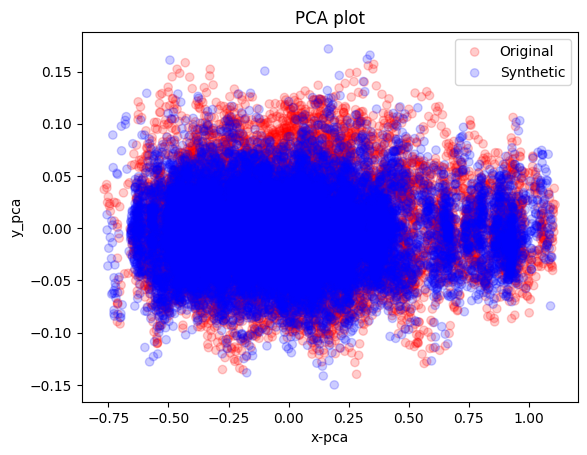

In [11]:
visualization(ori_data=ori_data, generated_data=fake_data, analysis='pca', compare=ori_data.shape[0])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 39424 samples in 0.001s...
[t-SNE] Computed neighbors for 39424 samples in 1.860s...
[t-SNE] Computed conditional probabilities for sample 1000 / 39424
[t-SNE] Computed conditional probabilities for sample 2000 / 39424
[t-SNE] Computed conditional probabilities for sample 3000 / 39424
[t-SNE] Computed conditional probabilities for sample 4000 / 39424
[t-SNE] Computed conditional probabilities for sample 5000 / 39424
[t-SNE] Computed conditional probabilities for sample 6000 / 39424
[t-SNE] Computed conditional probabilities for sample 7000 / 39424
[t-SNE] Computed conditional probabilities for sample 8000 / 39424
[t-SNE] Computed conditional probabilities for sample 9000 / 39424
[t-SNE] Computed conditional probabilities for sample 10000 / 39424
[t-SNE] Computed conditional probabilities for sample 11000 / 39424
[t-SNE] Computed conditional probabilities for sample 12000 / 39424
[t-SNE] Computed conditional probabilities for sa

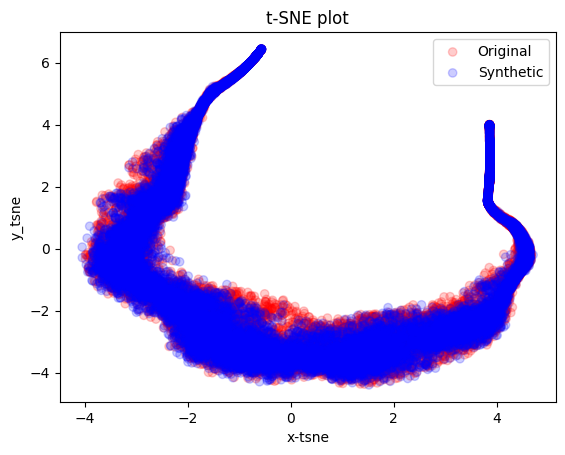

In [9]:
visualization(ori_data=ori_data, generated_data=fake_data, analysis='tsne', compare=ori_data.shape[0])

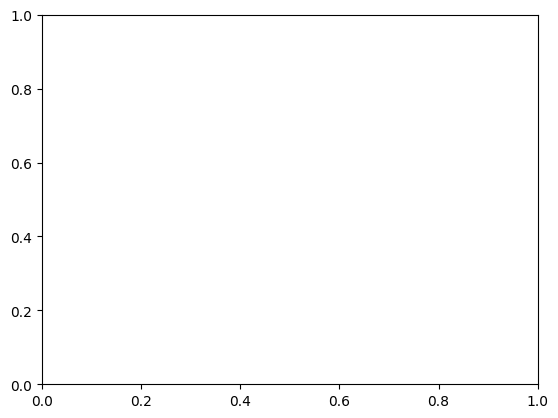

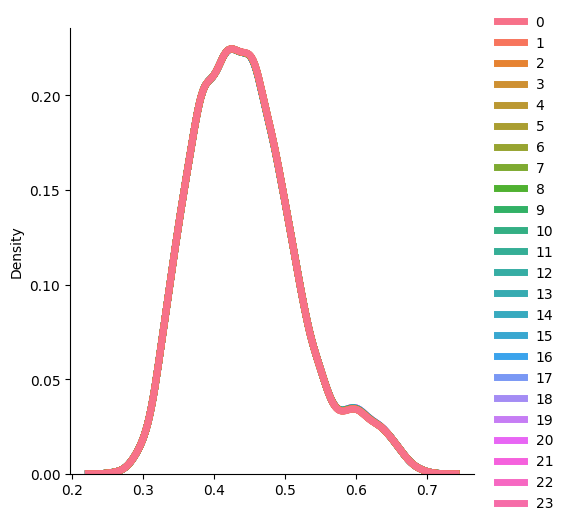

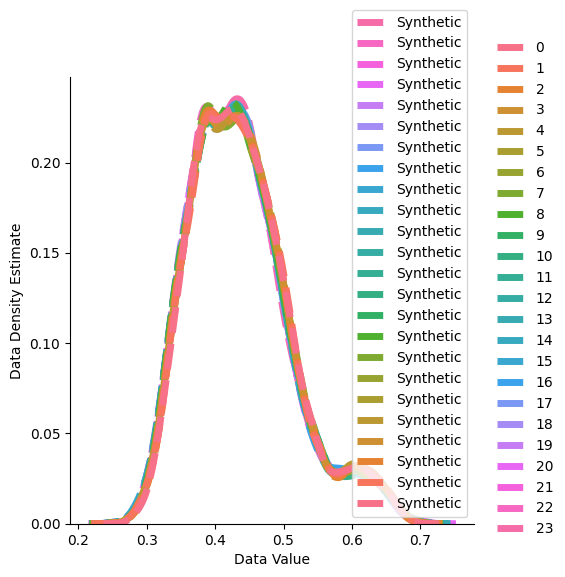

In [10]:
visualization(ori_data=ori_data, generated_data=fake_data, analysis='kernel', compare=ori_data.shape[0])